<a href="https://colab.research.google.com/github/naidu1997/Deep-Learning/blob/main/9_Implementation_RNN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First step, import libraries.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Import the dataset and encode the date
df = pd.read_csv('bitstampUSD.csv')
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [ ]:
Real_Price

date
2011-12-31        4.471603
2012-01-01        4.806667
2012-01-02        5.000000
2012-01-03        5.252500
2012-01-04        5.208159
                  ...     
2021-03-27    55193.357260
2021-03-28    55832.958824
2021-03-29    56913.993819
2021-03-30    58346.912268
2021-03-31    58764.349363
Name: Weighted_Price, Length: 3376, dtype: float64

In [ ]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [ ]:
df_train

date
2011-12-31        4.471603
2012-01-01        4.806667
2012-01-02        5.000000
2012-01-03        5.252500
2012-01-04        5.208159
                  ...     
2021-02-25    49985.234815
2021-02-26    46655.920049
2021-02-27    47130.208060
2021-02-28    44818.447552
2021-03-01    47641.536899
Name: Weighted_Price, Length: 3346, dtype: float64

In [ ]:
df_test

date
2021-03-02    48617.289321
2021-03-03    50429.449016
2021-03-04    49398.250399
2021-03-05    47717.643300
2021-03-06    48371.543538
2021-03-07    50218.216804
2021-03-08    50798.354212
2021-03-09    53980.847262
2021-03-10    55375.366241
2021-03-11    56272.596972
2021-03-12    56826.560033
2021-03-13    58802.601568
2021-03-14    60455.844831
2021-03-15    57507.734509
2021-03-16    55339.804792
2021-03-17    56158.017320
2021-03-18    58472.117322
2021-03-19    58283.547994
2021-03-20    58779.769387
2021-03-21    57312.598536
2021-03-22    56787.148422
2021-03-23    54703.387740
2021-03-24    55123.993855
2021-03-25    52121.684110
2021-03-26    53241.037489
2021-03-27    55193.357260
2021-03-28    55832.958824
2021-03-29    56913.993819
2021-03-30    58346.912268
2021-03-31    58764.349363
Name: Weighted_Price, dtype: float64

In [ ]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

C:\Users\TEKS108\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0274
Epoch 2/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0092
Epoch 3/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0073
Epoch 4/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0044
Epoch 5/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0021
Epoch 6/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.5244e-04
Epoch 7/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1083e-04
Epoch 8/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.4052e-05
Epoch 9/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.2854e-05
Epoch 10/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.8434e-05
Epoch 11/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.8236e-05
Epoch 12/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.6261e-05
Epoch 13/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.7891e-05
Epoch 14/100
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.8074e-05
Epoch 1

In [ ]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


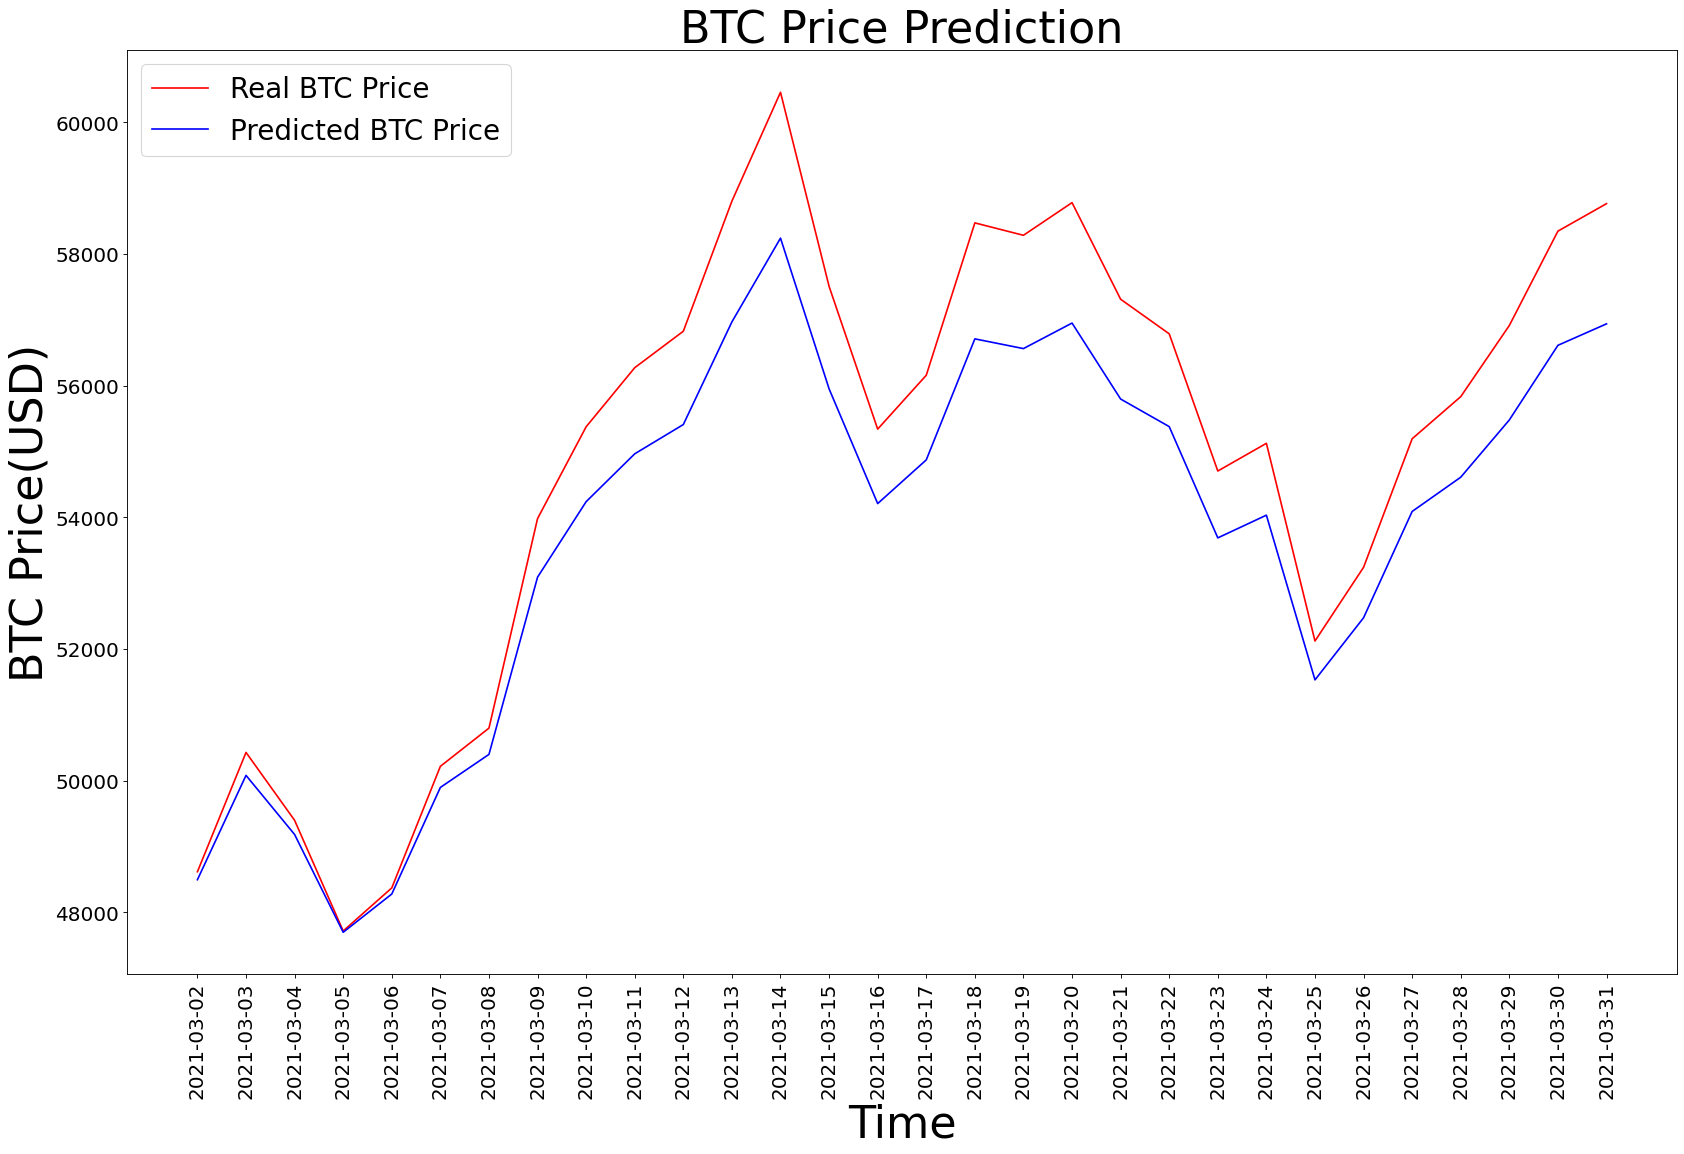

In [ ]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()
